In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv(r"C:\Users\tnvrj\Downloads\dataset.csv", low_memory=False)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [6]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [9]:
df.drop_duplicates(inplace=True)


df.drop(columns=['house_rules', 'license'], errors='ignore', inplace=True)


for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].str.replace('$', '', regex=False)
        df[col] = df[col].str.replace(',', '', regex=False)


df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)


df.dropna(inplace=True)


if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)


for col in ['id', 'host id']:
    if col in df.columns:
        df[col] = df[col].astype(str)


if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')


if 'construction year' in df.columns:
    df['construction year'] = df['construction year'].astype(int)


if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'].str.lower() == 'brooklin', 'neighbourhood group'] = 'Brooklyn'

if 'availability 365' in df.columns:
    df = df[df['availability 365'] <= 365]


In [10]:
df.duplicated().value_counts()

False    81263
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81263 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81263 non-null  object        
 1   NAME                            81263 non-null  object        
 2   host id                         81263 non-null  object        
 3   host_identity_verified          81263 non-null  object        
 4   host name                       81263 non-null  object        
 5   neighbourhood group             81263 non-null  object        
 6   neighbourhood                   81263 non-null  object        
 7   lat                             81263 non-null  float64       
 8   long                            81263 non-null  float64       
 9   country                         81263 non-null  object        
 10  country code                    81263 non-null  object        
 11  instan

In [12]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263,81263.000000,81263.000000,81263.000000,81263.000000
mean,40.727260,-73.948261,2012.490666,626.626177,125.326274,7.417349,32.025190,2019-06-21 04:15:15.604887808,1.391148,3.286391,7.106543,135.031847
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687620,-73.982060,2008.000000,341.000000,68.000000,2.000000,3.000000,2018-11-04 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721240,-73.953590,2012.000000,626.000000,125.000000,3.000000,11.000000,2019-06-14 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762490,-73.930490,2017.000000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056389,0.050630,5.761114,331.747348,66.352801,28.362955,51.669175,NaN,1.761232,1.278644,29.850375,128.453532


In [13]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,42932
Private room,36609
Shared room,1614
Hotel room,108


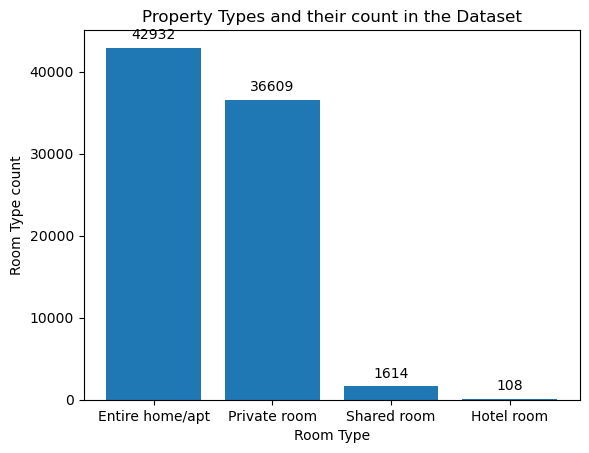

In [14]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4);
plt.xlabel("Room Type");
plt.ylabel("Room Type count");
plt.title("Property Types and their count in the Dataset");

In [15]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,33721
Manhattan,33547
Queens,10948
Bronx,2241
Staten Island,805
brookln,1


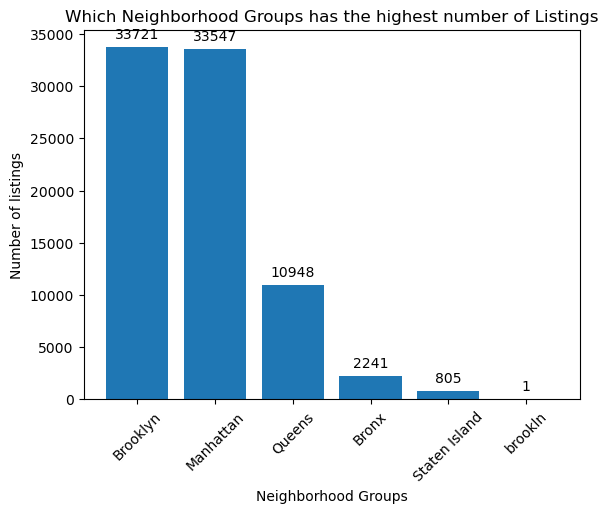

In [16]:
hood_group_bar = plt.bar(hood_group.index, hood_group['count']);
plt.bar_label(hood_group_bar, labels = hood_group['count'], padding = 4 );
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

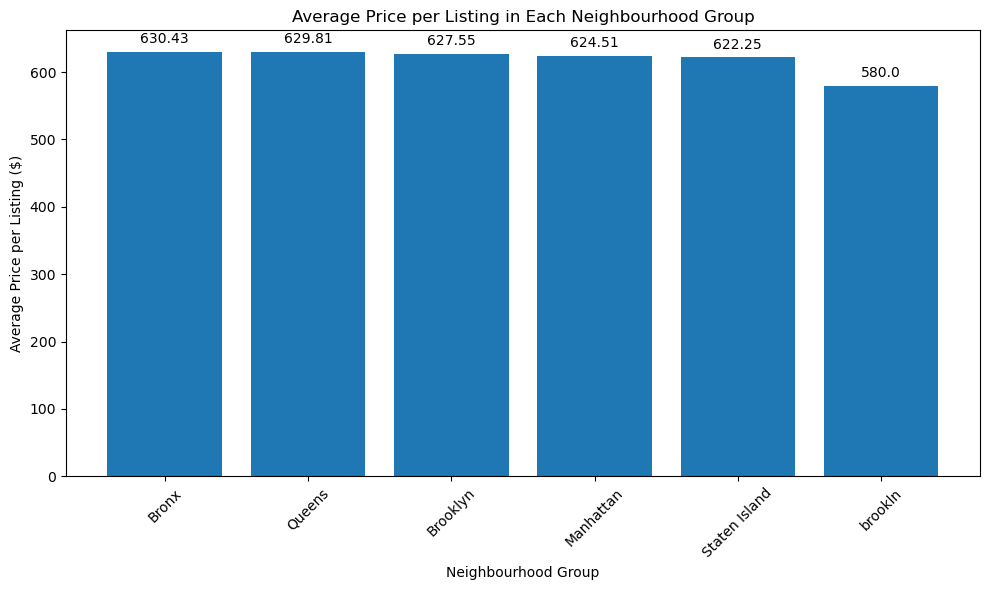

In [17]:
import matplotlib.pyplot as plt

avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(10, 6)) 
avg_price_bar = plt.bar(avg_price.index, avg_price['price_$'], label='Average Price')

plt.bar_label(avg_price_bar, labels=round(avg_price['price_$'], 2), label_type='edge', padding=4)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listing in Each Neighbourhood Group')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Price ($) for properties in each construction year')

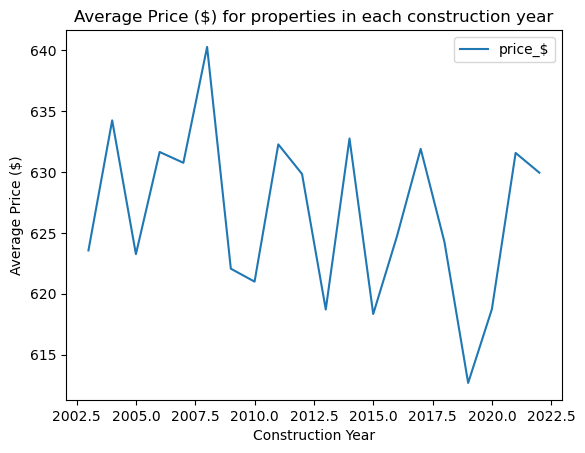

In [18]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for properties in each construction year')

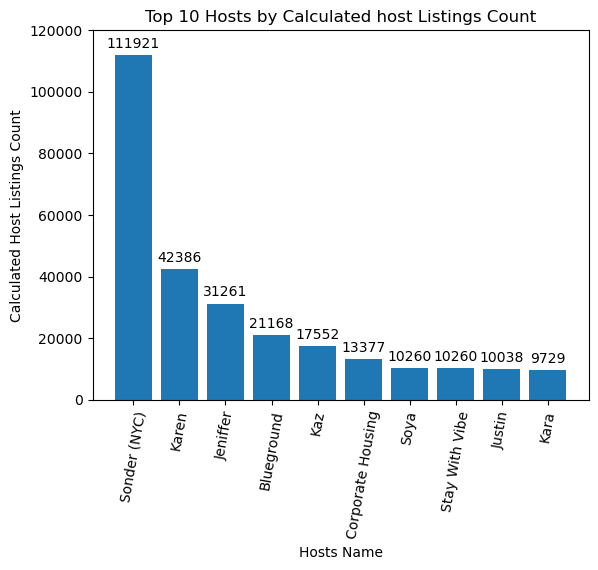

In [19]:
hosts = df.groupby ('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count' ]);
plt.bar_label(hosts_bar, label=hosts.loc[:, 'calculated host listings count'], label_type='edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');

In [20]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending= False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.289849
unconfirmed,3.282933


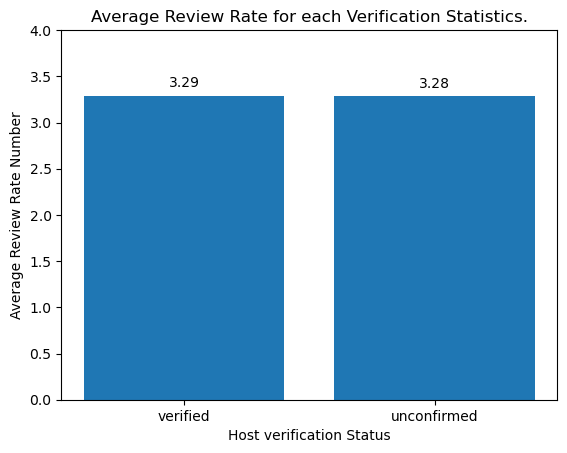

In [21]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel( 'Host verification Status');
plt.ylabel('Average Review Rate Number');
plt.title( 'Average Review Rate for each Verification Statistics.');

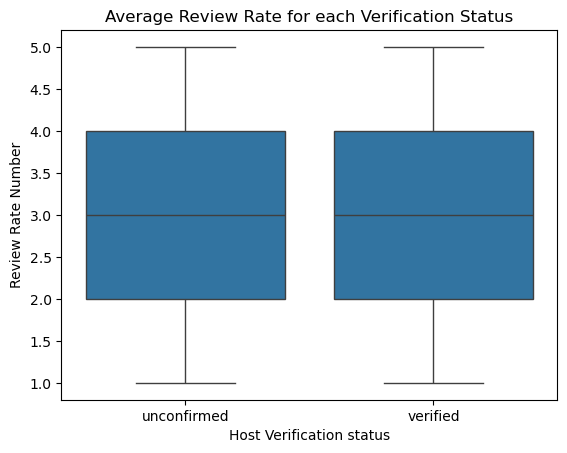

In [22]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification status' );
plt.ylabel('Review Rate Number');
plt.title( 'Average Review Rate for each Verification Status');

In [23]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.999990899703629)

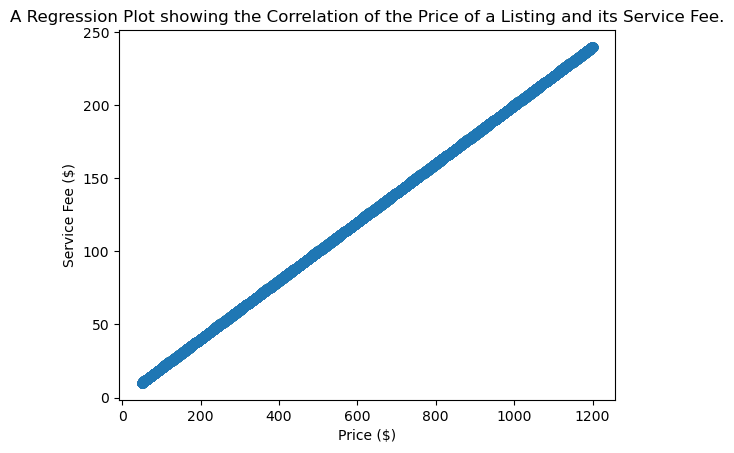

In [36]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

In [37]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.378190
                    Private room               3.315789
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.251608
                    Hotel room                 3.833333
                    Private room               3.283480
                    Shared room                3.327759
Manhattan           Entire home/apt            3.274865
                    Hotel room                 3.500000
                    Private room               3.293528
                    Shared room                3.269350
Queens              Entire home/apt            3.358646
                    Hotel room                 3.750000
                    Private room               3.317546
                    Shared room                3.326087
Staten Island       Entire home/apt            3.326877
                    Private room               3.490909
                    Shared room                3.714286
brookln             Private room               4.000000

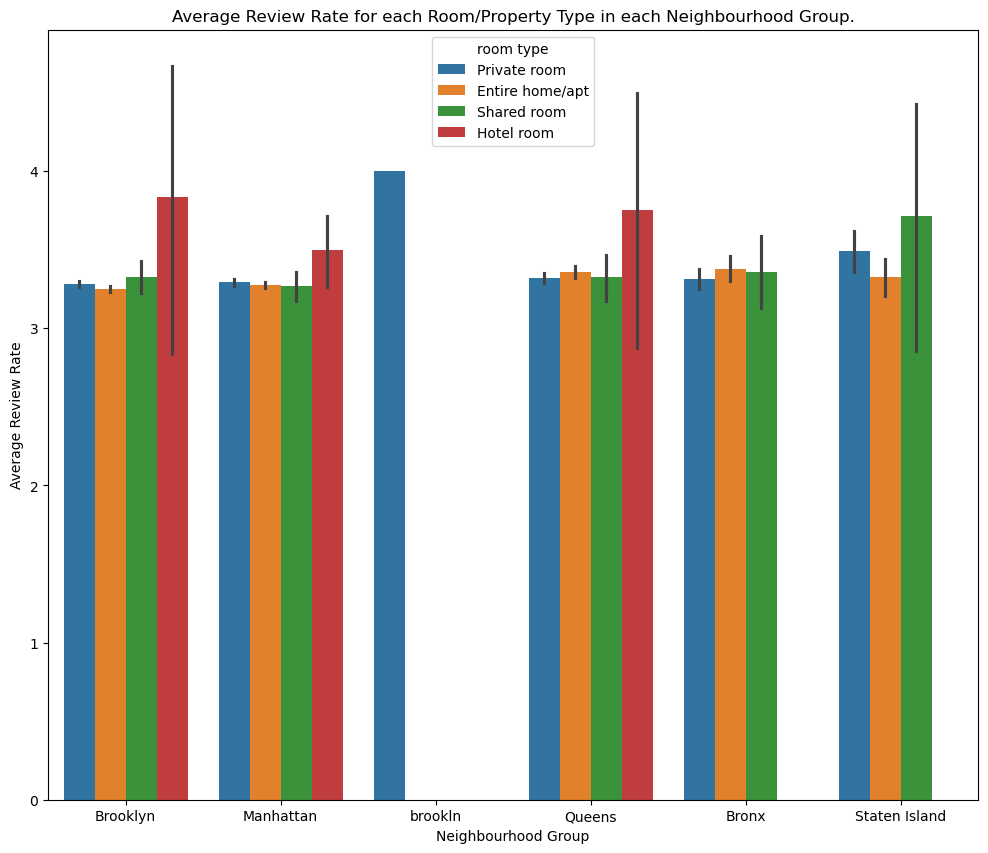

In [39]:
plt.figure(figsize = [12,10]);
sns.barplot (data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type' );
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

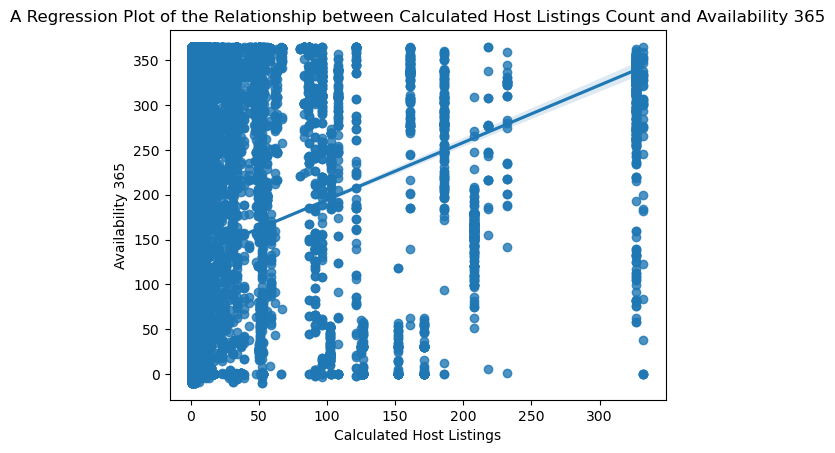

In [47]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [48]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.14856264998419247)